# Optimizing Functions of One Variable: Cost Minimization

과제 목표:

- 단일 변수(one variable) 함수의 간단한 최적화 문제 해결

비즈니스 시나리오:

- 두 공급업체의 과거 제품 가격 데이터를 활용하여

- 미래에 최상의 투자 가치를 얻기 위해, 각 공급업체로부터 구매할 **제품의 비율(share)**을 식별

수학적 수행 절차:

- 최소화하고자 하는 목표 함수(Target function)를 구성하여(평균과 분산) 함수의 최솟값(Minimum) 계산 및 평가
- **도함수(Derivative)** 가 최솟값 도출 결과와 어떻게 연결되는지 분석

# Table of Contents

- [ 1 - Statement of the Optimization Problem](#1)
  - [ 1.1 - Description of the Problem](#1.1)
  - [ 1.2 - Mathematical Statement of the Problem](#1.2)
  - [ 1.3 - Solution Approach](#1.3)
- [ 2 - Optimizing Function of One Variable in Python](#2)
  - [ 2.1 - Packages](#2.1)
  - [ 2.2 - Open and Analyze the Dataset](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 - Construct the Function $\mathcal{L}$ to Optimize and Find its Minimum Point](#2.3)
    - [ Exercise 2](#ex02)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)

<a name='1'></a>
## 1 - Statement of the Optimization Problem

<a name='1.1'></a>
### 1.1 - Description of the Problem

**문제 정의 (Problem Definition)**

- 목표: 향후 12개월 동안 제품 P의 생산 비용을 최소화하기 위한 최적의 구매 전략 수립
- 제약 조건:공급업체 A와 B 사이의 구매 비율(Split)을 결정해야 함결정된 비율은 12개월 동안 일정하게 유지되어야 함 (예: A 60%, B 40%)
- 가용 데이터: 2018년 2월 ~ 2020년 3월까지의 월별 평균 가격 데이터

**수학적 접근 (Mathematical Approach)**
- 단순히 과거 평균 가격이 낮은 한 업체를 100% 선정하는 것이 아니라, **가중치 $\omega$** 를 도입하여 혼합 비율을 분석
- 변수 설정

>> $\omega$: 공급업체 A로부터 구매하는 비율 ($0 \le \omega \le 1$)

>> $1 - \omega$: 공급업체 B로부터 구매하는 비율비용

- 함수 구성: 두 업체의 가격 변동성을 고려하여, 전체 비용(또는 가격 변동의 위험)을 최소화하는 $\omega$ 값을 찾는 최적화 문제로 변환

**의사결정의 핵심**

- 과거 데이터를 분석했을 때, 한 업체와만 거래하는 것($\omega=0$ 또는 $1$)보다 두 업체를 특정 비율로 섞는 것($0 < \omega < 1$)이 더 경제적이거나 안정적인지 판단해야 함
- 이는 앞서 다룬 손실 함수 $\mathcal{L}(\omega)$를 최소화하는 지점을 찾는 것과 동일한 맥락임(즉 단일변수 $\omega$, $parameter$를 구하라)

<a name='1.2'></a>
### 1.2 - Mathematical Statement of the Problem

비용 함수 모델링

- 변수 정의: $p_A, p_B$ (각 사의 가격), $n$ (월 공급 물량), $\omega$ (A사 공급 비중, $0 \leq \omega \leq 1$)

- 총 비용 공식:$$f\left(\omega\right) = p_A \omega \,*n+ p_B \left(1 - \omega\right) *n$$

>> $\omega=1$이면 A사 전담

>> $\omega=0$이면 B사 전담, 그 사이 값은 혼합 공급을 의미모델

단순화 (Normalization)

- 물량 $n$은 향후 12개월간 상수로 고정되어 있어 최적 비율 산출에 영향을 주지 않음
- 일반적인 수학적 접근에 따라 $n=1$로 가정하여 식을 단순화함:$$f\left(\omega\right) = p_A \omega+ p_B \left(1 - \omega\right) \tag{1}$$

최적화 난제 (Optimization Challenge)

- 불확실성: 미래의 가격 $p_A, p_B$는 알 수 없으며, $k$개월 분의 과거 데이터($p_A^i, p_B^i$)만 가용함

- 변동성: 과거 기록을 보면 A사가 더 저렴했던 시기($p_A^i < p_B^i$)와 B사가 더 저렴했던 시기($p_A^i > p_B^i$)가 혼재되어 있음

- 핵심 목표: 이러한 과거 변동성을 고려했을 때, 미래의 비용을 최소화할 수 있는 근거 있는 $\omega$ 값을 도출할 수 있는가?

<a name='1.3'></a>
### 1.3 - Solution Approach

 문제의 본질 (Problem Context)
 - 통계학에서 잘 알려진 포트폴리오 관리(Portfolio Management) 문제의 일종
 - 과거 가격 데이터를 기반으로 비용을 최소화(이익 극대화)하는 최적의 투자 결정을 내리는 것이 목표

 접근 방법 및 손실 함수 (Methodology)
 - 1단계: 각 과거 시점($i$)의 비용 $f^i(\omega)$와 전체 평균 $\overline{f(\omega)}$ 계산
 - 2단계: 가격이 평균에서 벗어나는 정도(변동성)를 줄여 가능한 한 "안정적인" 상태를 만드는 것을 목표로 함
 - 3단계 (손실 함수 정의): 편차(차이)의 제곱의 평균인 **분산(Variance)** 을 최소화해야 할 함수 $\mathcal{L}(\omega)$로 정의함$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2\tag{2}$$

 이론적 배경 (Theoretical Basis)
 - 단순 평균 비용을 최소화하는 것이 아니라, 리스크 관리(Risk Management) 이론에 따라 분산(변동성)을 최적화하는 것이 핵심
 - 통계학적으로 $\mathcal{L}(\omega)$를 최소화하는 $\omega$ 값($0 \le \omega \le 1$)이 존재함이 증명되어 있음

 학습 목표 (Course Objective)
 - 통계학적 이론을 깊이 파고들기보다는, 데이터셋을 기반으로 한 단일 변수 함수의 최적화 문제를 실습하는 데 초점


 이제 데이터를 로드하여 실제로 함수 $\mathcal{L}(\omega)$의 최솟값을 찾는 과정을 학습하기

### **왜 $\mathcal{L}(\omega)$ (분산)를 최소화하는 것이 Risk를 줄이는 것인가?**
이 함수 $\mathcal{L}(\omega)$는 통계학에서 말하는 **분산(Variance)**입니다. 금융과 경제학에서 **'위험(Risk)'은 '불확실성(Uncertainty)'**으로 정의됩니다.

예측 가능성 (Predictability):

- 상황 A (분산이 큼): 이번 달 비용이 50원일지, 150원일지 모릅니다. 평균은 100원이지만, 예산을 짤 때 150원을 대비해야 하므로 자금 운용이 비효율적입니다.
- 상황 B (분산이 작음): 이번 달 비용이 99원 아니면 101원입니다. 평균은 100원입니다. 이 경우 예산을 100원에 맞춰도 큰 문제가 없습니다.

- 기업 입장에서는 비용 자체가 낮은 것도 중요하지만, **"다음 달에 얼마가 나갈지 정확히 아는 것"** 이 경영 계획상 매우 중요합니다.
- 분산을 줄인다는 것은 가격이 평균값 근처에 딱 붙어있게 만든다는 뜻이므로, "깜짝 놀랄 일(Shock)"을 없애는 과정입니다.

헤징 효과 (Hedging Effect):

- 공급업체 A의 가격이 오를 때 B의 가격이 내린다면(음의 상관관계), 두 업체를 적절히 섞었을 때 가격 변동이 서로 상쇄(Cancel out)되어 전체 비용은 일정해집니다.


<a name='2'></a>
## 2 - Optimizing Function of One Variable in Python

<a name='2.1'></a>
### 2.1 - Packages

Let's import all of the required packages. In addition to the ones you have been using in this Course before, you will need to import `pandas` library. It is a commonly used package for data manipulation and analysis.

In [ ]:
# A function to perform automatic differentiation.
from jax import grad
# A wrapped version of NumPy to use JAX primitives.
import jax.numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# A magic command to make output of plotting commands displayed inline within the Jupyter notebook.
%matplotlib inline

Load the unit tests defined for this notebook.

<a name='2.2'></a>
### 2.2 - Open and Analyze the Dataset

Historical prices for both suppliers A and B are saved in the file `data/prices.csv`. To open it you can use `pandas` function `read_csv`. This example is very simple, there is no need to use any other parameters.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Mathematical Thinking/Mathematics-for-Machine-Learning/C2_Linear Regression/w1/C2w1_graded_lab/data/prices.csv'
df = pd.read_csv(path)

In [ ]:
df

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81
5,1/07/2016,105,84
6,1/08/2016,114,90
7,1/09/2016,102,93
8,1/10/2016,105,93
9,1/11/2016,101,99


To print a list of the column names use `columns` attribute of the DataFrame:

In [ ]:
print(df.columns)

Index(['date', 'price_supplier_a_dollars_per_item',
       'price_supplier_b_dollars_per_item'],
      dtype='object')


데이터 확인 및 선택:

- 표와 열 이름을 검토한 결과, 월별 가격(USD) 데이터임을 확인
- 분석에 필요한 열: price_supplier_a_dollars_per_item, price_supplier_b_dollars_per_item

데이터 전처리 (참고):

- 실무 데이터셋은 훨씬 방대하며 모델 입력 전 철저한 검토 및 정제(Cleaning) 과정이 필수적이나 본 과정의 학습 목표상 이러한 전처리 과정은 다루지 않음

In [ ]:
df.head()

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81


## **가장 가격이 안정적인(예측 가능한) 구매 비율을 찾기 위해 분산을 최소화하는 과정**

<a name='ex01'></a>
### Exercise 1

Load the historical prices of supplier A and supplier B into variables `prices_A` and `prices_B`, respectively. Convert the price values into `NumPy` arrays with elements of type `float32` using `np.array` function.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>The corresponding prices are in the DataFrame `df`, columns `price_supplier_a_dollars_per_item` and `price_supplier_b_dollars_per_item`.</li>
    <li>Conversion into the `NumPy` array can be performed with the function `np.array`.</li>
</ul>
</p>

In [ ]:
### START CODE HERE ### (~ 4 lines of code)
prices_A = df["price_supplier_a_dollars_per_item"]
prices_B = df["price_supplier_b_dollars_per_item"]
prices_A = np.array(prices_A).astype(np.float32)
prices_B = np.array(prices_B).astype(np.float32)
### END CODE HERE ###

In [ ]:
# Print some elements and mean values of the prices_A and prices_B arrays.
print("Some prices of supplier A:", prices_A[0:5])
print("Some prices of supplier B:", prices_B[0:5])
print("Average of the prices, supplier A:", np.mean(prices_A))
print("Average of the prices, supplier B:", np.mean(prices_B))

Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0


##### __Expected Output__

```Python
Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0
```

Average prices from both suppliers are similar. But if you will plot the historical prices, you will see that there were periods of time when the prices were lower for supplier A, and vice versa.

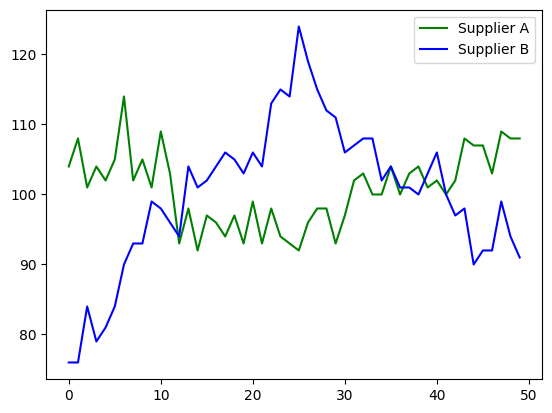

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(prices_A, 'g', label="Supplier A")
plt.plot(prices_B, 'b', label="Supplier B")
plt.legend()

plt.show()

Based on the historical data, can you tell which supplier it will be more profitable to work with? As discussed in the section [1.3](#1.3), you need to find such an $\omega \in \left[0, 1\right]$ which will minimize function $(2)$.

<a name='2.3'></a>
### 2.3 - Construct the Function $\mathcal{L}$ to Optimize and Find its Minimum Point

<a name='ex02'></a>
### Exercise 2

Calculate `f_of_omega`, corresponding to the $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ are saved in the arrays `prices_A` and `prices_B`. Thus, multiplying them by the scalars `omega` and `1 - omega` and adding together the resulting arrays, you will get an array containing $\{f^1\left(\omega\right), \cdots, f^k\left(\omega\right)\}$.


Then array `f_of_omega` can be taken to calculate `L_of_omega`, according to the expression $(2)$:

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2$$

In [ ]:
import numpy

def f_of_omega(omega):
    ### START CODE HERE ### (~ 1 line of code)
    f = prices_A*omega+(1-omega)*prices_B
    ### END CODE HERE ###
    return f

def L_of_omega(omega):
    return 1/len(f_of_omega(omega)) * np.sum((f_of_omega(omega) - np.mean(f_of_omega(omega)))**2)

In [ ]:
print("L(omega = 0) =",L_of_omega(0))
print("L(omega = 0.2) =",L_of_omega(0.2))
print("L(omega = 0.8) =",L_of_omega(0.8))
print("L(omega = 1) =",L_of_omega(1))

L(omega = 0) = 110.72
L(omega = 0.2) = 61.156807
L(omega = 0.8) = 11.212797
L(omega = 1) = 27.48


Analysing the output above, you can notice that values of the function $\mathcal{L}$ are decreasing for $\omega$ increasing from $0$ to $0.2$, then to $0.8$, but there is an increase of the function $\mathcal{L}$ when $\omega = 1$. What will be the $\omega$ giving the minimum value of the function $\mathcal{L}$?

In this simple example $\mathcal{L}\left(\omega\right)$ is a function of one variable and the problem of finding its minimum point with a certain accuracy is a trivial task. You just need to calculate function values for each $\omega = 0, 0.001, 0.002, \cdots , 1$ and find minimum element of the resulting array.

Function `L_of_omega` will not work if you will pass an array instead of a single value of `omega` (it was not designed for that). It is possible to rewrite it in a way that it would be possible, but here there is no need in that right now - you can calculate the resulting values in the loop as there will be not as many of them.

<a name='ex03'></a>
### Exercise 3

Evaluate function `L_of_omega` for each of the elements of the array `omega_array` and pass the result into the corresponding element of the array `L_array` with the function `.at[<index>].set(<value>)`.

*Note*: `jax.numpy` has been uploaded instead of the original `NumPy`. Up to this moment `jax` functionality has not been actually used, but it will be called in the cells below. Thus there was no need to upload both versions of the package, and you have to use `.at[<index>].set(<value>)` function to update the array.

In [ ]:
# Parameter endpoint=True will allow ending point 1 to be included in the array.
# This is why it is better to take N = 1001, not N = 1000
N = 1001
omega_array = np.linspace(0, 1, N, endpoint=True)

# This is organised as a function only for grading purposes.
def L_of_omega_array(omega_array):
    N = len(omega_array)
    L_array = np.zeros(N)
    for i in range(0,N):
        ### START CODE HERE ### (~ 2 lines of code)
        L = L_of_omega(omega_array[i])
        L_array = L_array.at[i].set(L)
        ### END CODE HERE ###

    return L_array

L_array = L_of_omega_array(omega_array)

In [ ]:
print("L(omega = 0) =",L_array[0])
print("L(omega = 1) =",L_array[N-1])

L(omega = 0) = 110.72
L(omega = 1) = 27.48


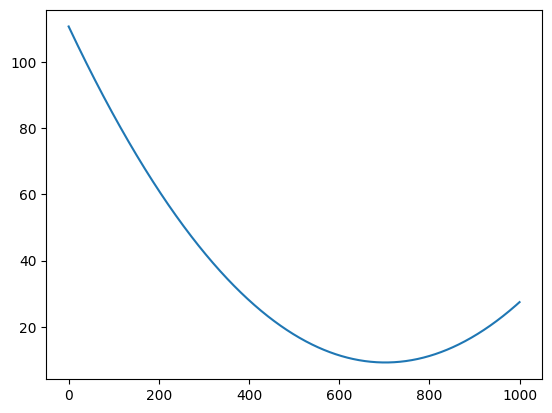

In [ ]:
plt.plot(L_array)

Now a minimum point of the function $\mathcal{L}\left(\omega\right)$ can be found with a `NumPy` function `argmin()`. As there were $N = 1001$ points taken in the segment $\left[0, 1\right]$, the result will be accurate to three decimal places:

In [ ]:
i_opt = L_array.argmin()
omega_opt = omega_array[i_opt]
L_opt = L_array[i_opt]
print(f'omega_min = {omega_opt:.3f}\nL_of_omega_min = {L_opt:.7f}')

omega_min = 0.702
L_of_omega_min = 9.2497187


This result means that, based on the historical data, $\omega = 0.702$ is expected to be the most profitable choice for the share between suppliers A and B. It is reasonable to plan $70.2\%$ of product P to be supplied from Company A, and $29.8\%$ from Company B.

If you would like to improve the accuracy, you just need to increase the number of points N. This is a very simple example of a model with one parameter, resulting in optimization of a function of one variable. It is computationally cheap to evaluate it in many points to find the minimum with certain accuracy. But in machine learning the models have hundreds of parameters, using similar approach you would need to perform millions of target function evaluations. This is not possible in most of the cases, and that's where Calculus with its methods and approaches comes into play.

In the next weeks of this Course you will learn how to optimize multivariate functions using differentiation. But for now as you are on the learning curve, let's evaluate the derivative of the function $\mathcal{L}\left(\omega\right)$ at the points saved in the array `omega_array` to check that at the minimum point the derivative is actually the closest to zero.

<a name='ex04'></a>
### Exercise 4

For each $\omega$ in the `omega_array` calculate $\frac{d\mathcal{L}}{d\omega}$ using `grad()` function from `JAX` library. Remember that you need to pass the function which you want to differentiate (here $\mathcal{L}\left(\omega\right)$) as an argument of `grad()` function and then evaluate the derivative for the corresponding element of the `omega_array`. Then pass the result into the corresponding element of the array `dLdOmega_array` with the function `.at[<index>].set(<value>)`.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Function $\mathcal{L}\left(\omega\right)$ is implemented in the code as `L_of_omega`.</li>
</ul>
</p>

In [ ]:
# This is organised as a function only for grading purposes.
def dLdOmega_of_omega_array(omega_array):
    N = len(omega_array)
    dLdOmega_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        dLdOmega = grad(L_of_omega)(omega_array[i])
        dLdOmega_array = dLdOmega_array.at[i].set(dLdOmega)
        ### END CODE HERE ###

    return dLdOmega_array

dLdOmega_array = dLdOmega_of_omega_array(omega_array)

In [ ]:
print("dLdOmega(omega = 0) =",dLdOmega_array[0])
print("dLdOmega(omega = 1) =",dLdOmega_array[N-1])

dLdOmega(omega = 0) = -288.96
dLdOmega(omega = 1) = 122.47999


##### __Expected Output__

```Python
dLdOmega(omega = 0) = -288.96
dLdOmega(omega = 1) = 122.47999
```

Now to find the closest value of the derivative to $0$, take absolute values $\left|\frac{d\mathcal{L}}{d\omega}\right|$ for each omega and find minimum of them.

In [ ]:
i_opt_2 = np.abs(dLdOmega_array).argmin()
omega_opt_2 = omega_array[i_opt_2]
dLdOmega_opt_2 = dLdOmega_array[i_opt_2]
print(f'omega_min = {omega_opt_2:.3f}\ndLdOmega_min = {dLdOmega_opt_2:.7f}')

omega_min = 0.702
dLdOmega_min = -0.1290798


The result is the same: $\omega = 0.702$. Let's plot $\mathcal{L}\left(\omega\right)$ and $\frac{d\mathcal{L}}{d\omega}$ to visualize the graphs of them, minimum point of the function $\mathcal{L}\left(\omega\right)$ and the point where its derivative is around $0$:

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3458860420.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_array,  L_array, "black", label = "$\mathcal{L}\\left(\omega\\right)$")
/tmp/ipython-input-3458860420.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_array,  dLdOmega_array, "orange", label = "$\mathcal{L}\'\\left(\omega\\right)$")


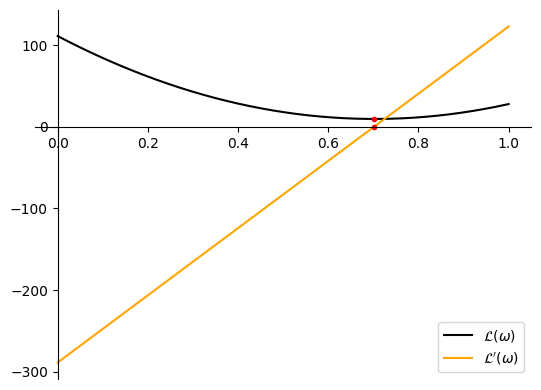

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Setting the axes at the origin.
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(omega_array,  L_array, "black", label = "$\mathcal{L}\\left(\omega\\right)$")
plt.plot(omega_array,  dLdOmega_array, "orange", label = "$\mathcal{L}\'\\left(\omega\\right)$")
plt.plot([omega_opt, omega_opt_2], [L_opt,dLdOmega_opt_2], 'ro', markersize=3)

plt.legend()

plt.show()

Congratulations, you have finished the assignment for this week! This example illustrates how optimization problems may appear in real life, and gives you an opportunity to explore the simple case of minimizing a function with one variable. Now it is time to learn about optimization of multivariate functions!

# **Pytorch로 Optimization**

In [ ]:
import torch
import numpy as onp # Import standard numpy as 'onp' to avoid conflict with jax.numpy

# 1. 데이터 준비 (예시: A사는 가격 변동 적음, B사는 큼)

# prices_A와 prices_B가 JAX numpy array이므로 PyTorch tensor로 변환
# JAX array를 표준 NumPy array로 변환한 후 PyTorch tensor로 바꾸기
prices_A_torch = torch.tensor(onp.asarray(prices_A), dtype=torch.float32)
prices_B_torch = torch.tensor(onp.asarray(prices_B), dtype=torch.float32)

# 2. 최적화할 변수 (Omega) 설정
# requires_grad=True: 이 변수에 대한 미분값을 자동으로 추적합니다.
# 0과 1 사이의 무작위 난수 생성
random_number = torch.rand(1)
omega = torch.tensor([random_number.item()], requires_grad=True)

# 3. 옵티마이저 정의 (Adam 사용)
optimizer = torch.optim.Adam([omega], lr=0.01)

print(f"초기 omega: {omega.item():.4f}")

# 4. 학습 루프
for i in range(500):
    # 기울기 초기화
    optimizer.zero_grad()

    # [순전파] 수식 그대로 코드로 작성
    # f(w) = pA * w + pB * (1-w)
    # PyTorch tensor로 변환된 prices_A_torch와 prices_B_torch 사용
    mixed_prices = prices_A_torch * omega + prices_B_torch * (1 - omega)

    # [손실 함수] 분산(Variance) 계산
    # correction=0은 통계식에서 n으로 나누는 것(모분산)을 의미합니다.
    loss = torch.var(mixed_prices, correction=0)

    # [역전파] 핵심! 알아서 미분 수행
    loss.backward()

    # [업데이트] 경사하강법으로 omega 수정
    optimizer.step()

    if i % 100 == 0:
        print(f"Iter {i}: Loss(분산) = {loss.item():.4f}, Omega = {omega.item():.4f}")

print("-" * 30)
print(f"최종 최적 omega: {omega.item():.4f}")

초기 omega: 0.2526
Iter 0: Loss(분산) = 50.8631, Omega = 0.2626
Iter 100: Loss(분산) = 9.2540, Omega = 0.7067
Iter 200: Loss(분산) = 9.2497, Omega = 0.7023
Iter 300: Loss(분산) = 9.2497, Omega = 0.7023
Iter 400: Loss(분산) = 9.2497, Omega = 0.7023
------------------------------
최종 최적 omega: 0.7023


### **학습률 (lr, Learning rate)**

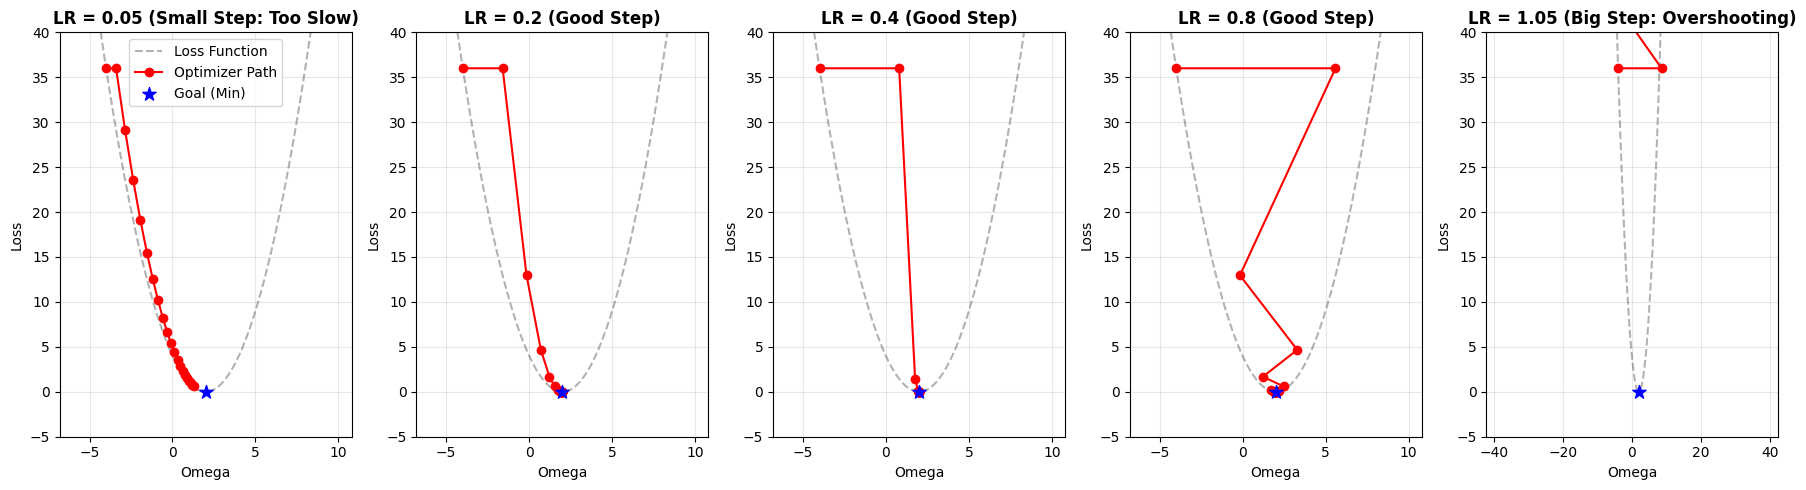

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# === 설정: 실험할 학습률 3가지를 정의합니다 ===
# 1. Small Step: 너무 조심스러워서 학습이 오래 걸림
# 2. Good Step: 적절한 보폭으로 빠르게 수렴
# 3. Big Step: 보폭이 너무 커서 정답을 지나치고 튕겨 나감 (Overshooting)
learning_rates = [0.05, 0.2, 0.4, 0.8, 1.05]

# 시각화를 위한 배경 함수 데이터 (y = (x-2)^2)
x_base = np.linspace(-6, 10, 100)
y_base = (x_base - 2)**2

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

# === 실험 루프 ===
for i, lr in enumerate(learning_rates):
    # 1. 초기값 설정 (정답인 2에서 멀리 떨어진 -4에서 시작)
    # requires_grad=True로 미분 추적 활성화
    omega = torch.tensor([-4.0], requires_grad=True)

    # 2. 옵티마이저 설정 (SGD가 학습률의 영향을 가장 잘 보여줌)
    optimizer = torch.optim.SGD([omega], lr=lr)

    # 이동 경로 저장용 리스트
    path_x = [omega.item()]
    path_y = [(omega.item() - 2)**2]

    # 3. 학습 (20번 반복)
    for _ in range(20):
        optimizer.zero_grad()           # 기울기 초기화
        loss = (omega - 2)**2           # 손실 함수 정의
        loss.backward()                 # 역전파 (기울기 계산)
        optimizer.step()                # 파라미터 업데이트 (이동)

        # 경로 기록
        path_x.append(omega.item())
        path_y.append(loss.item())

    # === 시각화 (Plotting) ===
    ax = axes[i]
    ax.plot(x_base, y_base, 'k--', alpha=0.3, label='Loss Function') # 검은 점선: 손실 함수
    ax.plot(path_x, path_y, 'o-', color='red', label='Optimizer Path') # 빨간 선: 이동 경로
    ax.scatter(2, 0, c='blue', s=100, zorder=5, marker='*', label='Goal (Min)') # 파란 별: 목표 지점

    # 그래프 꾸미기
    title = f"LR = {lr} "
    if lr < 0.1: title += "(Small Step: Too Slow)"
    elif lr > 0.9: title += "(Big Step: Overshooting)"
    else: title += "(Good Step)"

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Omega')
    ax.set_ylabel('Loss')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-5, 40)
    if i == 0: ax.legend()

plt.tight_layout()
plt.show()